#                                     EXPLORATORY DATA ANALYSIS REPORT

Name-Rajrishi Sarkar,Roll-203110061

# Data description

Metallic Glass Descriptors:

	Relevant papers:
		There is no paper published on this data set at the present time.  The data was assembled
		primarily by Vanessa Nilsen under the guidance of Prof. Dane Morgan at UW Madison
		 (ddmorgan@wisc.edu).
		A previous study of reduced glass transition temperature as a GFA descriptor can be found in reference [5]:
		https://www.sciencedirect.com/science/article/pii/S0022309300000648
		
	X features:
		The metallic glass dataset gives two columns with information about the material
		Composition. The first is the overall composition, and the second is the highest
		Composition element. The columns from four to the end are the MAGPIE features that
		have been generated from the material composition column and give values such as
		properties averaged over the material composition as well as features that are only for 
		the majority element in each alloy [3]. The majority element features are labelled as 
		"site1".
		
	Y property:
		The reduced glass transition temperature (Trg) has historically been used as a rough 
		predictor for Glass Forming Ability (GFA). By making a model to predict Trg for an 
		arbitrary alloy, it could be possible to use these values to estimate GFA directly, or as 
		input for another model to then predict GFA.

# loading libraries

In [37]:
load.libraries <- c('data.table', 'testthat', 'gridExtra', 'corrplot', 'GGally', 'ggplot2', 'e1071', 'dplyr','tidyverse',
                   'psych','ggpubr','MASS','fastDummies','lares')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)


Warning message:
"package 'lares' is not available (for R version 3.6.1)"Loading required package: testthat
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'testthat'"Loading required package: lares
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'lares'"

data.table    testthat   gridExtra    corrplot      GGally     ggplot2 
       TRUE       FALSE        TRUE        TRUE        TRUE        TRUE 
      e1071       dplyr   tidyverse       psych      ggpubr        MASS 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
fastDummies       lares 
       TRUE       FALSE

# Importing dataset

In [2]:
data<-read.csv("C:\\Users\\ADMIN\\Desktop\\data for data analysis\\stats project\\features.csv")
df<-as.data.frame(data)
#viewing the datset
head(df)

Material.compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,...,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
Ag10Cu35Zr55,Zr,0.534,0.57906932,-0.5856000,1.0298821,1.0298821,0.5895359,0.2175710,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag10Cu50Zr40,Cu,0.608,0.74840145,-0.5856000,1.0298821,1.0298821,1.1762502,0.6539689,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag10Cu55Zr35,Cu,0.609,0.80484550,-0.5856000,1.0298821,1.0298821,1.3718216,0.7994348,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag20Cu40Zr40,Cu,0.577,0.82197318,-0.5856000,1.0298821,1.0298821,1.1762502,0.6539689,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag35Ca65,Ca,0.515,-0.86099185,-0.5856000,-0.9989612,-0.9989612,-0.4372142,-0.6136631,-1.684370,...,1.0059113,0.8578491,-1.7450349,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Al13.3Co26.7Zr60,Zr,0.573,0.05888908,0.4642294,0.6147495,0.6147495,-0.6479424,-0.5920510,0.563915,...,-0.3242381,-1.1657062,-0.7402658,-1.139306,1.5622891,-0.5844290,-1.392731,-1.392731,-1.106354,1.5750435


***DATA DIMENSIONS***

In [3]:
dim(df)

[1] 585  23

the target depends upon the 22 features

***FEATURE TYPES***

In [4]:
str(df)

'data.frame':	585 obs. of  23 variables:
 $ Material.compositions                : Factor w/ 585 levels "Ag10Cu35Zr55",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ main_element                         : Factor w/ 27 levels "Al","Au","Be",..: 27 7 7 7 4 27 27 4 27 23 ...
 $ Trg                                  : num  0.534 0.608 0.609 0.577 0.515 0.573 0.565 0.545 0.572 0.527 ...
 $ Density_composition_average          : num  0.579 0.748 0.805 0.822 -0.861 ...
 $ IsBoron_composition_average          : num  -0.586 -0.586 -0.586 -0.586 -0.586 ...
 $ IsDBlock_composition_average         : num  1.03 1.03 1.03 1.03 -0.999 ...
 $ IsTransitionMetal_composition_average: num  1.03 1.03 1.03 1.03 -0.999 ...
 $ NdValence_composition_average        : num  0.59 1.176 1.372 1.176 -0.437 ...
 $ NValance_composition_average         : num  0.218 0.654 0.799 0.654 -0.614 ...
 $ HeatVaporization_max_value           : num  0.564 0.564 0.564 0.564 -1.684 ...
 $ BoilingT_difference                  : num  0.545 0.545 0.5

OBSERVATION:::
1. "Material.compositions" & "main_element " are the two categorical features, all others
are numerical ones

***CHECKING FOR MISSING VALUES***

In [5]:
colSums(sapply(df, is.na))

Material.compositions                          main_element 
                                    0                                     0 
                                  Trg           Density_composition_average 
                                    0                                     0 
          IsBoron_composition_average          IsDBlock_composition_average 
                                    0                                     0 
IsTransitionMetal_composition_average         NdValence_composition_average 
                                    0                                     0 
         NValance_composition_average            HeatVaporization_max_value 
                                    0                                     0 
                  BoilingT_difference           HeatVaporization_difference 
                                    0                                     0 
                  MeltingT_difference                  NdValence_difference 
                                    0                                     0 
                NsUnfilled_difference                    valence_difference 
                                    0                                     0 
                        Site1_Density                Site1_HeatCapacityMass 
                                    0                                     0 
                     Site1_HeatFusion                        Site1_IsDBlock 
                                    0                                     0 
              Site1_IsTransitionMetal                       Site1_NdValence 
                                    0                                     0 
           Site1_SpecificHeatCapacity 
                                    0

OBSERVATION:::
1.  there are no missing values in any of the features including the target variable, no need to perform missing 
value imputation on the dataset

## Univariate analysis of the features

***FEATURE STATISTICS***

In [71]:
summary(df)


      Material.compositions  main_element      Trg        
 Ag10Cu35Zr55    :  1       Cu     :113   Min.   :0.2230  
 Ag10Cu50Zr40    :  1       Zr     : 95   1st Qu.:0.5570  
 Ag10Cu55Zr35    :  1       Fe     : 70   Median :0.5840  
 Ag20Cu40Zr40    :  1       Ca     : 68   Mean   :0.5774  
 Ag35Ca65        :  1       Mg     : 49   3rd Qu.:0.6090  
 Al13.3Co26.7Zr60:  1       Ni     : 38   Max.   :0.6880  
 (Other)         :579       (Other):152                   
 Density_composition_average IsBoron_composition_average
 Min.   :-2.2964             Min.   :-0.5856            
 1st Qu.:-0.6580             1st Qu.:-0.5856            
 Median : 0.1413             Median :-0.5856            
 Mean   : 0.0000             Mean   : 0.0000            
 3rd Qu.: 0.4915             3rd Qu.: 0.2045            
 Max.   : 4.4187             Max.   : 6.4790            
                                                        
 IsDBlock_composition_average IsTransitionMetal_composition_average
 Min

***DENSITY PLOTS OF ALL THE NUMERICAL FEATURES***

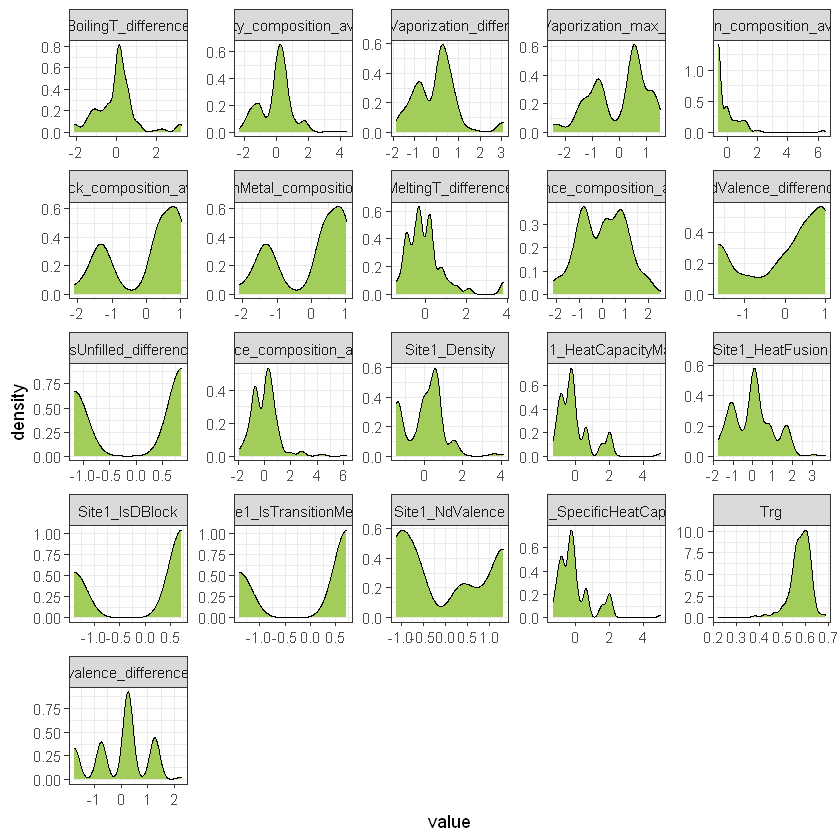

In [34]:
#distplots of multiple features
df %>%
  keep(is.numeric) %>%                     # Keep only numeric columns
  gather() %>%                             # Convert to key-value pairs
  ggplot(aes(value)) +                     # Plot the values
    facet_wrap(~ key, scales = "free") +   # In separate panels
    geom_density(fill="darkolivegreen3")       # as density

OBSERVATIONS::: 
1. as it can seen all the variables have different distributions.
2. The target variable "glass transition temp" is having a left skewed distribution.
3. almost all the features have 2 or more peaks in the distribution.
4. "IsBoron_composition_average" has an exponential distribution


***BOXPLOTS***

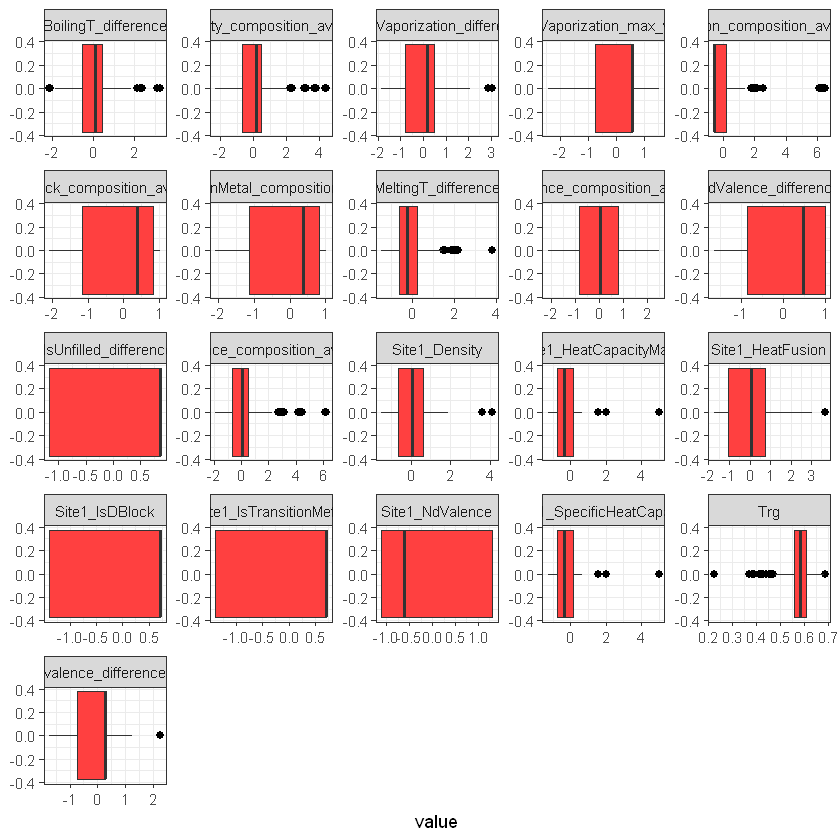

In [36]:
#boxplots
df %>%
  keep(is.numeric) %>%
  gather() %>%                             
  ggplot(aes(value)) +                     
    facet_wrap(~ key, scales = "free") +   
    geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=2, notch=FALSE,fill="brown1")                         

OBSERVATIONS::
1. "trg" has too many outliers.
2. features like "Site_heatfusion","site1_density","site1_heatcapacitymass","melting_temp_difference","BoilingT_difference","
IsBoron_composition_average" also contains outliers.

***COUNTPLOT***

***countplot of "main elements"***

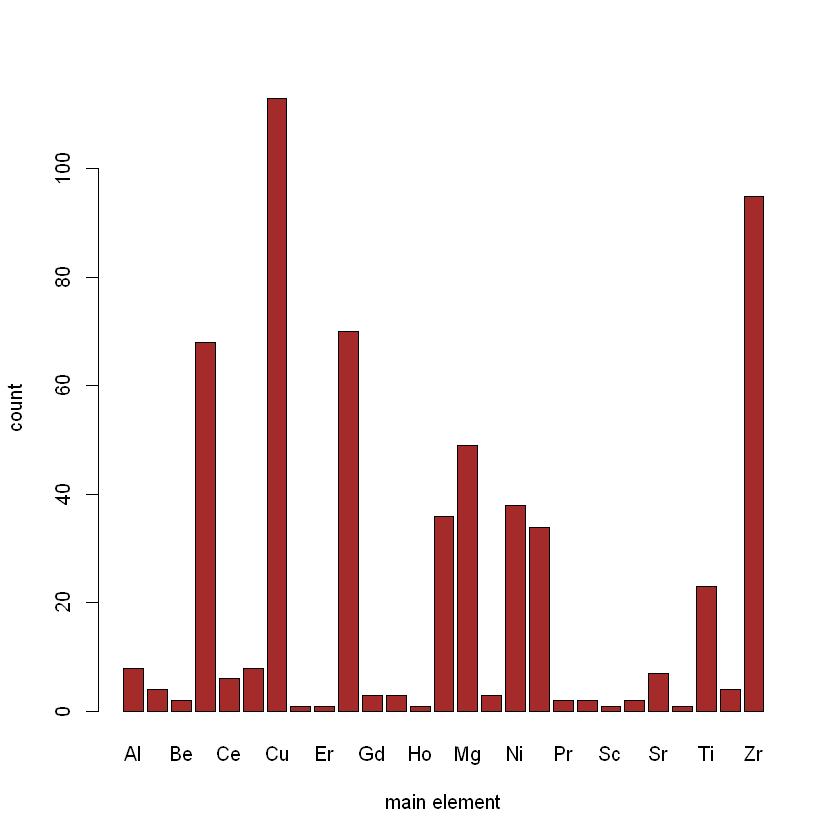

In [111]:
x <- table(df$main_element)
barplot(x,col="brown",xlab="main element",ylab="count")

***TARGET FEATURE ANALYSIS***                  

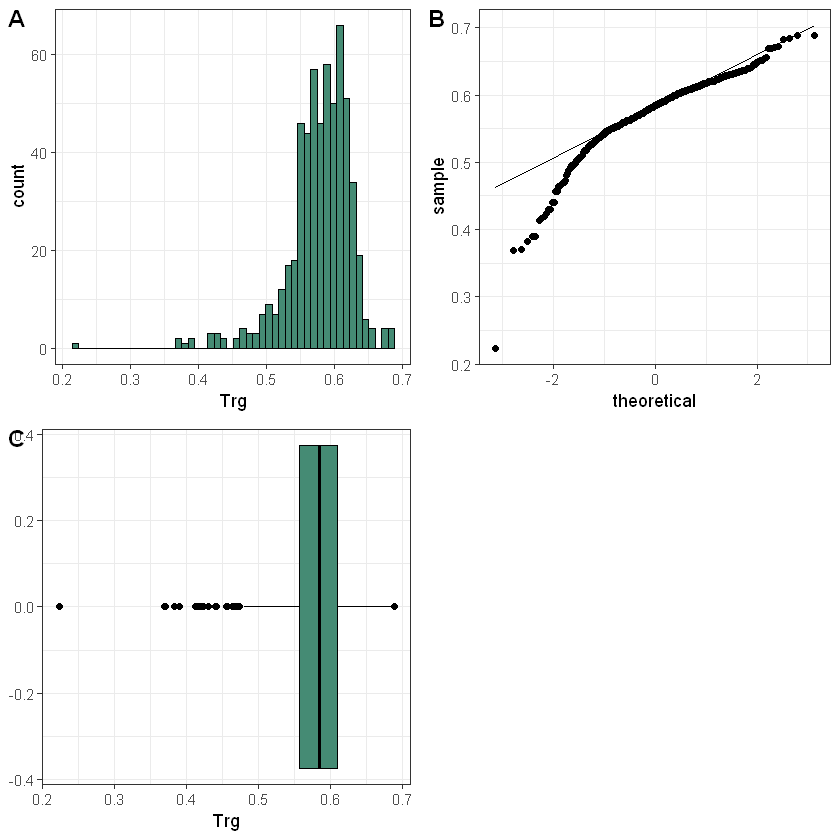

In [18]:
#3chart plot 
theme_set(
  theme_bw() +
    theme(legend.position = "top")
)
tgt=function(txt) #Visualize the target
{ds=ggplot(df,aes(Trg))+geom_histogram(color='black',fill=txt,bins = 50) #Skew? Kurtosis?
bxp=ggplot(df,aes(Trg))+geom_boxplot(color='black',fill=txt) #Outliers?
qq= ggplot(df,aes(sample=Trg))+ stat_qq() + stat_qq_line() #Normal distribution?
ggarrange(ds, qq, bxp,
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)
}
tgt('aquamarine4')


OBSERVATIONS:::
1. our target feature is 'reduced glass transition temperature' is the measure of GFA.
2. the boxplot says that it contains outliers
3. the distribution is left skewed.
4. the qq plot suggests that there is a deviation from normal distribution.

# Bivariate analysis

***CORRELATION BETWEEN THE FEATURES***

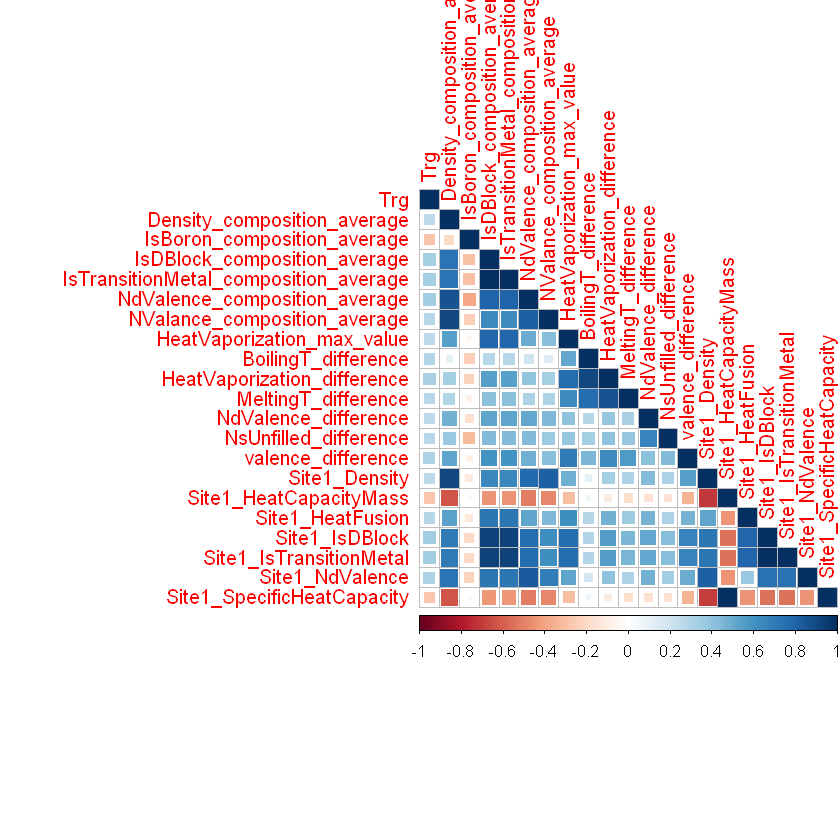

In [40]:
#extracting the numericqal features 
df_numer <- subset(df, select = -c(Material.compositions,main_element) )
#plotting a correlation matrix
corrplot(cor(df_numer),method = "square",type="lower")


In [46]:
#finding the most correlated features
cor(df_numer) %>%
  as.data.frame() %>%
  mutate(var1 = rownames(.)) %>%
  gather(var2, value, -var1) %>%
  arrange(desc(value)) %>%
  group_by(value) %>%
  filter(row_number()==1)

var1,var2,value
Trg,Trg,1.0000000
Site1_SpecificHeatCapacity,Site1_HeatCapacityMass,0.9999816
Site1_IsDBlock,IsDBlock_composition_average,0.9217491
HeatVaporization_difference,BoilingT_difference,0.9095843
NValance_composition_average,Density_composition_average,0.9045063
Site1_Density,Density_composition_average,0.9030622
MeltingT_difference,HeatVaporization_difference,0.8635075
NdValence_composition_average,Density_composition_average,0.8632754
Site1_NdValence,NdValence_composition_average,0.8364252
Site1_Density,NValance_composition_average,0.8195043


OBSERVATIONS::the most correlated variables are

1. Site1_SpecificHeatCapacity---Site1_HeatCapacityMass	---- 0.9999816
2. Site1_IsDBlock----IsDBlock_composition_average----0.9217491
3. HeatVaporization_difference----BoilingT_difference----0.9095843
4. NValance_composition_average----Density_composition_average----0.9045063
5. Site1_Density----Density_composition_average----0.9030622
6. MeltingT_difference----HeatVaporization_difference----0.8635075
7. NdValence_composition_average-----Density_composition_average----0.8632754
8. Site1_NdValence-----NdValence_composition_average---- 0.8364252
9. Site1_Density----NValance_composition_average----0.8195043
10. NValance_composition_average----NdValence_composition_average---- 0.8150236
11. Site1_NdValence----Site1_Density----0.8148377
12. NdValence_composition_average-----IsDBlock_composition_average---- 0.8090395
13. also no feature is highly correlated with the target variable

***SCATTERPLOTS OF HIGHLY CORRELATED VARIABLES***

NULL

NULL

NULL

NULL

NULL

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


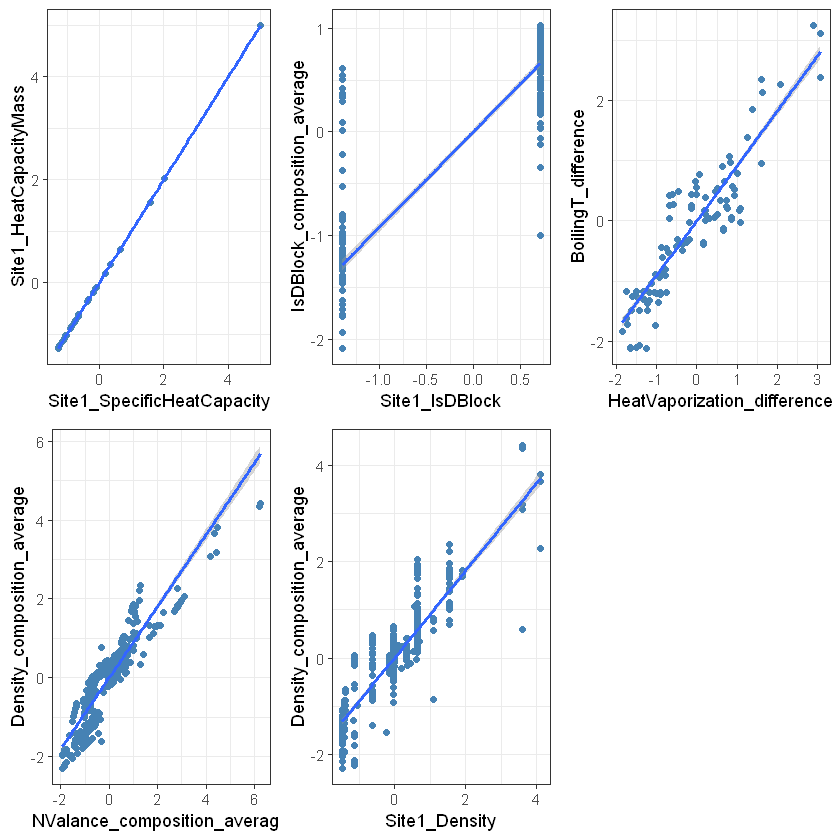

In [79]:
#scatterplots
par(mfrow = c(3, 2))

a <- ggplot(df,aes(x=Site1_SpecificHeatCapacity ,y=Site1_HeatCapacityMass ))+geom_point(color= "steelblue")+geom_smooth(method = "lm")
labs(x="Site1_SpecificHeatCapacity",y="Site1_HeatCapacityMass ")+theme_light()

b <- ggplot(df,aes(x=Site1_IsDBlock ,y=IsDBlock_composition_average ))+geom_point(color= "steelblue")+geom_smooth(method = "lm")
labs(x="Site1_IsDBlock",y="IsDBlock_composition_average",title = "scatterplots")+theme_light()

c <- ggplot(df,aes(x=HeatVaporization_difference ,y=BoilingT_difference ))+geom_point(color= "steelblue")+geom_smooth(method = "lm")
labs(x="HeatVaporization_difference",y="BoilingT_difference")+theme_light()

d <- ggplot(df,aes(x=NValance_composition_average ,y=Density_composition_average))+geom_point(color= "steelblue")+geom_smooth(method = "lm")
labs(x="NValance_composition_average",y="Density_composition_average")+theme_light()

e <- ggplot(df,aes(x=Site1_Density ,y=Density_composition_average))+geom_point(color= "steelblue")+geom_smooth(method = "lm")
labs(x="Site1_Density",y="Density_composition_average")+theme_light()

ggarrange(a,b,c,d,e)